In [1]:
import pandas as pd

In [2]:
df_death_rates = pd.read_csv('../data/Air-pollution/death-rates-from-air-pollution.csv')
df_death_rates

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate),Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,370.050474,30.822693,402.175651,6.581093
1,Afghanistan,AFG,1991,358.978418,29.826184,390.085258,6.267613
2,Afghanistan,AFG,1992,352.766453,29.202030,383.201196,5.926444
3,Afghanistan,AFG,1993,357.055923,29.429702,387.704919,5.860345
4,Afghanistan,AFG,1994,362.970439,29.813259,394.022027,6.065343
...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,143.477957,38.996842,183.044625,1.091220
6836,Zimbabwe,ZWE,2016,140.643245,37.585998,179.060638,1.231540
6837,Zimbabwe,ZWE,2017,137.448374,35.811023,174.048806,1.447558
6838,Zimbabwe,ZWE,2018,133.923031,34.932825,169.534057,1.407389


In [3]:
del df_death_rates['Code']

In [4]:
df_death_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 6 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Entity                                                                                                                  6840 non-null   object 
 1   Year                                                                                                                    6840 non-null   int64  
 2   Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)  6840 non-null   float64
 3   Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)      6840 non-null   float64


In [5]:
df_death_rates.rename(columns={
    'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)': 'Deaths by household air pollution from fuels',
    'Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)': 'Death by ambient particulate pollution', 
    'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate)': 'Deaths by air pollution', 
    'Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)': 'Deaths by ambient ozone pollution'}, inplace=True)

In [6]:
print({'First year': df_death_rates['Year'].min(), 'Last year': df_death_rates['Year'].max()})

{'First year': 1990, 'Last year': 2019}


In [7]:
df_death_rates['Entity'].unique()

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

In [8]:
df_death_rates.drop('Year', axis = 1).corr()

,Deaths by household air pollution from fuels,Death by ambient particulate pollution,Deaths by air pollution,Deaths by ambient ozone pollution
Deaths by household air pollution from fuels,1.000000,-0.187287,0.931028,0.186746
Death by ambient particulate pollution,-0.187287,1.000000,0.183813,0.312673
Deaths by air pollution,0.931028,0.183813,1.000000,0.315682
Deaths by ambient ozone pollution,0.186746,0.312673,0.315682,1.000000


In [9]:
pol_2017 = df_death_rates[df_death_rates['Year'] == 2017]
del pol_2017['Year']

In [10]:
pol_2017 = pol_2017.set_index(['Entity'])
pol_2017["Total pollution deaths"] = pol_2017.iloc[:, 0] + pol_2017.iloc[:, 1] + pol_2017.iloc[:, 2] + pol_2017.iloc[:, 3]

In [11]:
pol_2017 = pol_2017[["Total pollution deaths", "Deaths by air pollution", "Deaths by household air pollution from fuels",
                     "Death by ambient particulate pollution", "Deaths by ambient ozone pollution"]]


In [12]:
pol_2017.sort_values('Total pollution deaths', ascending = False).head(10)

,Total pollution deaths,Deaths by air pollution,Deaths by household air pollution from fuels,Death by ambient particulate pollution,Deaths by ambient ozone pollution
Entity,,,,,
Solomon Islands,879.400251,439.699413,407.015946,32.682324,0.002569
Central African Republic,597.467585,296.063525,261.113170,32.976044,7.314846
Somalia,570.295119,284.767489,276.954935,7.700279,0.872415
Papua New Guinea,519.071708,259.535002,236.199487,23.334255,0.002963
Guinea-Bissau,512.988631,255.883915,209.612226,45.705684,1.786807
Vanuatu,511.555565,255.744282,223.835682,31.826432,0.149169
Afghanistan,503.212705,249.765861,194.333561,53.322356,5.790927
Nepal,473.737787,226.445845,124.287819,87.574700,35.429423
Niger,466.233308,232.212281,208.962719,22.880120,2.178188


In [13]:
pol_2017.sort_values('Total pollution deaths', ascending = True).head(10)

,Total pollution deaths,Deaths by air pollution,Deaths by household air pollution from fuels,Death by ambient particulate pollution,Deaths by ambient ozone pollution
Entity,,,,,
Finland,5.323986,2.660529,0.016917,2.482318,0.164222
Iceland,6.174079,3.083263,0.013188,2.713062,0.364567
Sweden,6.589013,3.290727,0.013321,2.933856,0.351110
New Zealand,7.516955,3.756554,0.033909,3.576338,0.150154
Australia,8.182815,4.089120,0.033044,3.916479,0.144173
Norway,8.528927,4.258288,0.010863,3.804530,0.455245
Puerto Rico,11.363443,5.680970,0.010195,5.626313,0.045965
Canada,12.356764,6.166748,0.012427,5.509664,0.667926
Scotland,13.791939,6.891485,0.011664,6.622062,0.266727




Let's see which countries decreased their pollution deaths the most over the years.






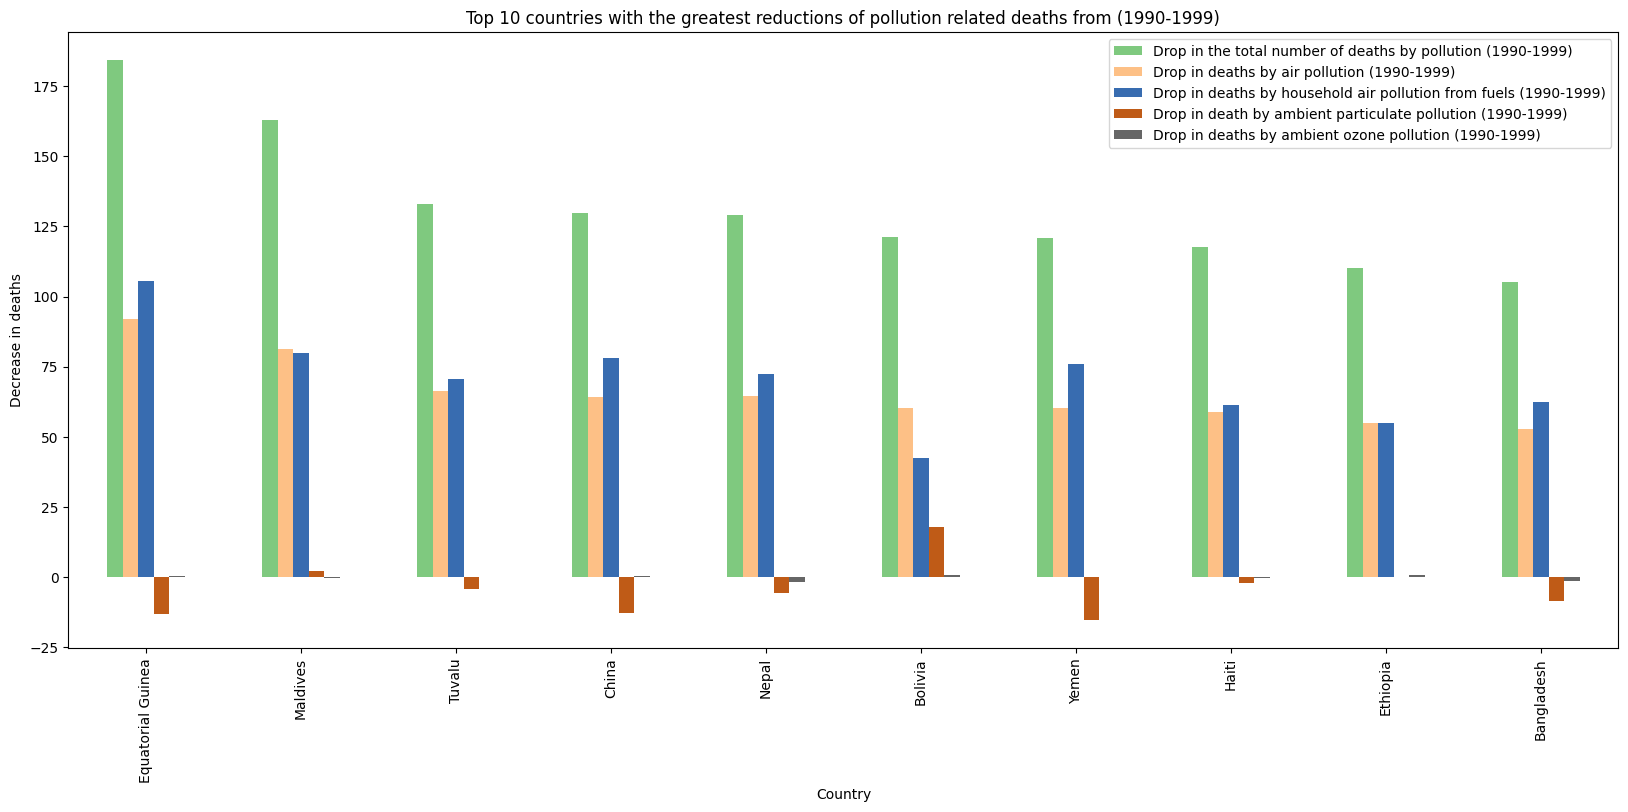

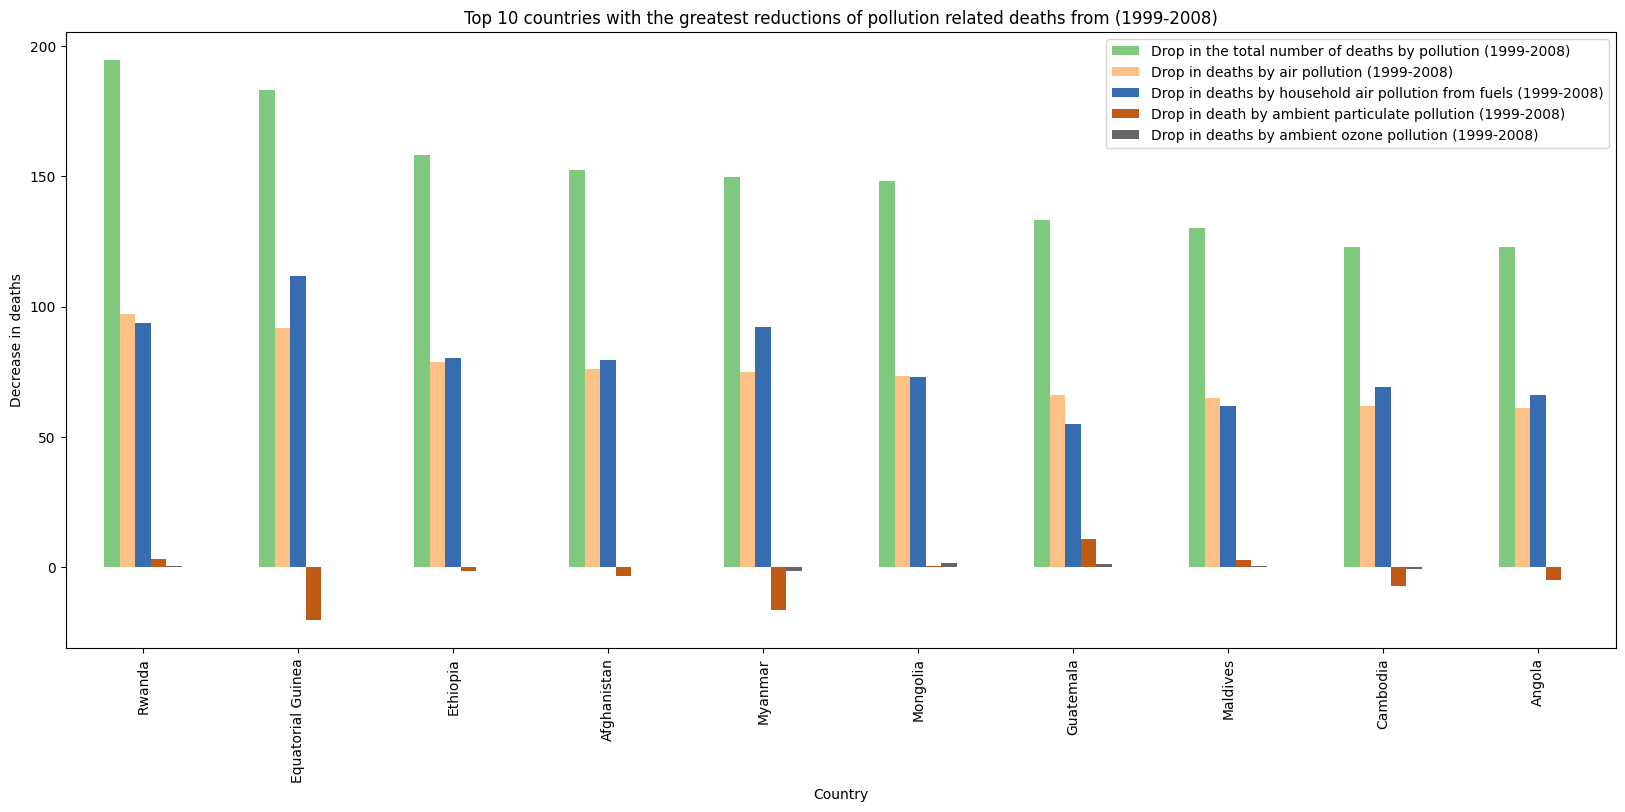

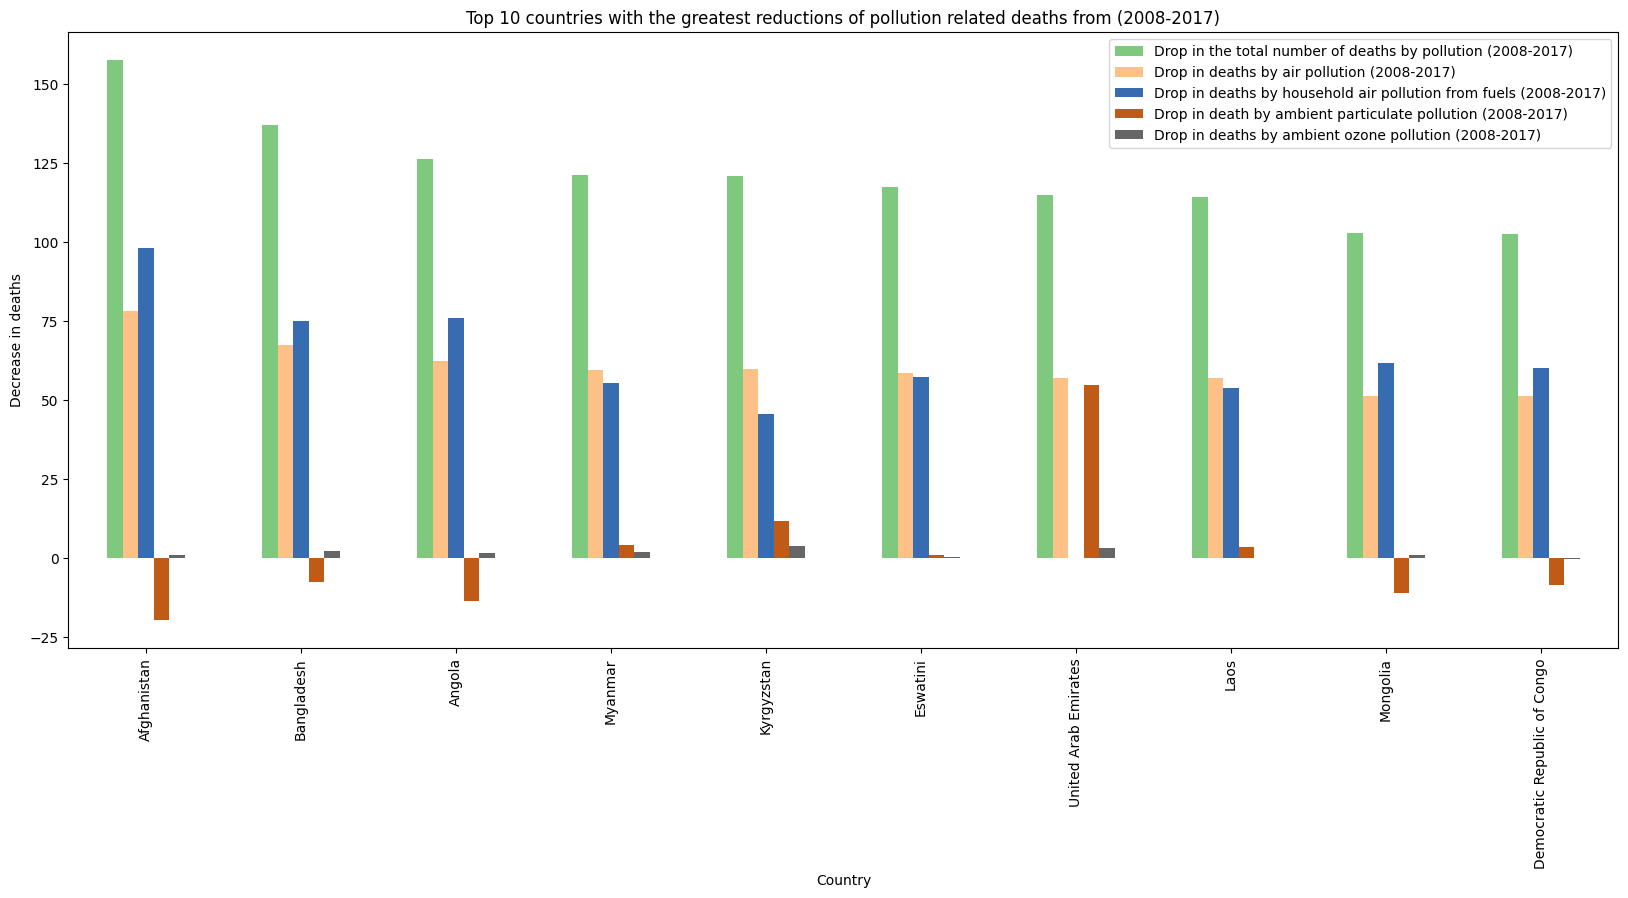

In [14]:
df_death_rates["Total pollution deaths"] = df_death_rates.iloc[:, 2] + df_death_rates.iloc[:, 3] + df_death_rates.iloc[:, 4] + df_death_rates.iloc[:, 5]
pol_con = df_death_rates.set_index(['Entity'])

countrys = list(df_death_rates['Entity'].unique())


############################################################################################

s = []

for i in countrys:
    
    m = pol_con.loc[i, ['Year', 'Deaths by air pollution', 'Deaths by household air pollution from fuels',
                        'Death by ambient particulate pollution', 'Deaths by ambient ozone pollution', 'Total pollution deaths']]
    
    s.append([i, m.loc[m['Year'] == 1990]['Total pollution deaths'] - m.loc[m['Year'] == 1999]['Total pollution deaths']
             ,m.loc[m['Year'] == 1990]['Deaths by air pollution'] - m.loc[m['Year'] == 1999]['Deaths by air pollution']
             , m.loc[m['Year'] == 1990]['Deaths by household air pollution from fuels'] - m.loc[m['Year'] == 1999]['Deaths by household air pollution from fuels']
             , m.loc[m['Year'] == 1990]['Death by ambient particulate pollution'] - m.loc[m['Year'] == 1999]['Death by ambient particulate pollution']
             , m.loc[m['Year'] == 1990]['Deaths by ambient ozone pollution'] - m.loc[m['Year'] == 1999]['Deaths by ambient ozone pollution']])


data1 = {'Country' : [], 'Drop in the total number of deaths by pollution (1990-1999)' : [],
         'Drop in deaths by air pollution (1990-1999)' : [],
        'Drop in deaths by household air pollution from fuels (1990-1999)' : [],
       'Drop in death by ambient particulate pollution (1990-1999)' : [],
        'Drop in deaths by ambient ozone pollution (1990-1999)' : []}


for i in range(len(s)):
    
    data1['Country'].append(s[i][0])
    data1['Drop in the total number of deaths by pollution (1990-1999)'].append(s[i][1][0])
    data1['Drop in deaths by air pollution (1990-1999)'].append(s[i][2][0])
    data1['Drop in deaths by household air pollution from fuels (1990-1999)'].append(s[i][3][0])
    data1['Drop in death by ambient particulate pollution (1990-1999)'].append(s[i][4][0])
    data1['Drop in deaths by ambient ozone pollution (1990-1999)'].append(s[i][5][0])
    
    
df1 = pd.DataFrame.from_dict(data1)
df1 = df1.set_index(['Country'])


############################################################################################

s = []

for i in countrys:
    
    m = pol_con.loc[i, ['Year', 'Deaths by air pollution', 'Deaths by household air pollution from fuels',
                        'Death by ambient particulate pollution', 'Deaths by ambient ozone pollution', 'Total pollution deaths']]
    
    s.append([i, m.loc[m['Year'] == 1999]['Total pollution deaths'] - m.loc[m['Year'] == 2008]['Total pollution deaths']
             ,m.loc[m['Year'] == 1999]['Deaths by air pollution'] - m.loc[m['Year'] == 2008]['Deaths by air pollution']
             , m.loc[m['Year'] == 1999]['Deaths by household air pollution from fuels'] - m.loc[m['Year'] == 2008]['Deaths by household air pollution from fuels']
             , m.loc[m['Year'] == 1999]['Death by ambient particulate pollution'] - m.loc[m['Year'] == 2008]['Death by ambient particulate pollution']
             , m.loc[m['Year'] == 1999]['Deaths by ambient ozone pollution'] - m.loc[m['Year'] == 2008]['Deaths by ambient ozone pollution']])

    

data2 = {'Country' : [], 'Drop in the total number of deaths by pollution (1999-2008)' : [],
         'Drop in deaths by air pollution (1999-2008)' : [],
         'Drop in deaths by household air pollution from fuels (1999-2008)' : [],
         'Drop in death by ambient particulate pollution (1999-2008)' : [],
         'Drop in deaths by ambient ozone pollution (1999-2008)' : []}


for i in range(len(s)):
    
    data2['Country'].append(s[i][0])
    data2['Drop in the total number of deaths by pollution (1999-2008)'].append(s[i][1][0])
    data2['Drop in deaths by air pollution (1999-2008)'].append(s[i][2][0])
    data2['Drop in deaths by household air pollution from fuels (1999-2008)'].append(s[i][3][0])
    data2['Drop in death by ambient particulate pollution (1999-2008)'].append(s[i][4][0])
    data2['Drop in deaths by ambient ozone pollution (1999-2008)'].append(s[i][5][0])
        

df2 = pd.DataFrame.from_dict(data2)
df2 = df2.set_index(['Country'])


############################################################################################

s = []

for i in countrys:
    
    m = pol_con.loc[i, ['Year', 'Deaths by air pollution', 'Deaths by household air pollution from fuels',
                        'Death by ambient particulate pollution', 'Deaths by ambient ozone pollution', 'Total pollution deaths']]
              
    s.append([i, m.loc[m['Year'] == 2008]['Total pollution deaths'] - m.loc[m['Year'] == 2017]['Total pollution deaths']
             , m.loc[m['Year'] == 2008]['Deaths by air pollution'] - m.loc[m['Year'] == 2017]['Deaths by air pollution']
             , m.loc[m['Year'] == 2008]['Deaths by household air pollution from fuels'] - m.loc[m['Year'] == 2017]['Deaths by household air pollution from fuels']
             , m.loc[m['Year'] == 2008]['Death by ambient particulate pollution'] - m.loc[m['Year'] == 2017]['Death by ambient particulate pollution']
             , m.loc[m['Year'] == 2008]['Deaths by ambient ozone pollution'] - m.loc[m['Year'] == 2017]['Deaths by ambient ozone pollution']])


data3 = {'Country' : [], 'Drop in the total number of deaths by pollution (2008-2017)' : [],
         'Drop in deaths by air pollution (2008-2017)' : [],
        'Drop in deaths by household air pollution from fuels (2008-2017)' : [],
       'Drop in death by ambient particulate pollution (2008-2017)' : [],
        'Drop in deaths by ambient ozone pollution (2008-2017)' : []}


for i in range(len(s)):
    
    data3['Country'].append(s[i][0])
    data3['Drop in the total number of deaths by pollution (2008-2017)'].append(s[i][1][0])
    data3['Drop in deaths by air pollution (2008-2017)'].append(s[i][2][0])
    data3['Drop in deaths by household air pollution from fuels (2008-2017)'].append(s[i][3][0])
    data3['Drop in death by ambient particulate pollution (2008-2017)'].append(s[i][4][0])
    data3['Drop in deaths by ambient ozone pollution (2008-2017)'].append(s[i][5][0])
    

df3 = pd.DataFrame.from_dict(data3)
df3 = df3.set_index(['Country'])


############################################################################################

dflist = [df1,df2,df3]
klist = ['(1990-1999)', '(1999-2008)', '(2008-2017)']
hlist = ['h1','h2','h3']


print("\n\nLet's see which countries decreased their pollution deaths the most over the years.\n\n\n\n")


for index,i in enumerate(hlist):
    i = dflist[index].sort_values('Drop in the total number of deaths by pollution ' + klist[index], ascending = False).head(10)
    i.plot.bar(figsize = (20,8), ylabel= 'Decrease in deaths',
               title = 'Top 10 countries with the greatest reductions of pollution related deaths from ' + klist[index],
               colormap = 'Accent')




Let's see which countries decreased their pollution deaths the least over the years.






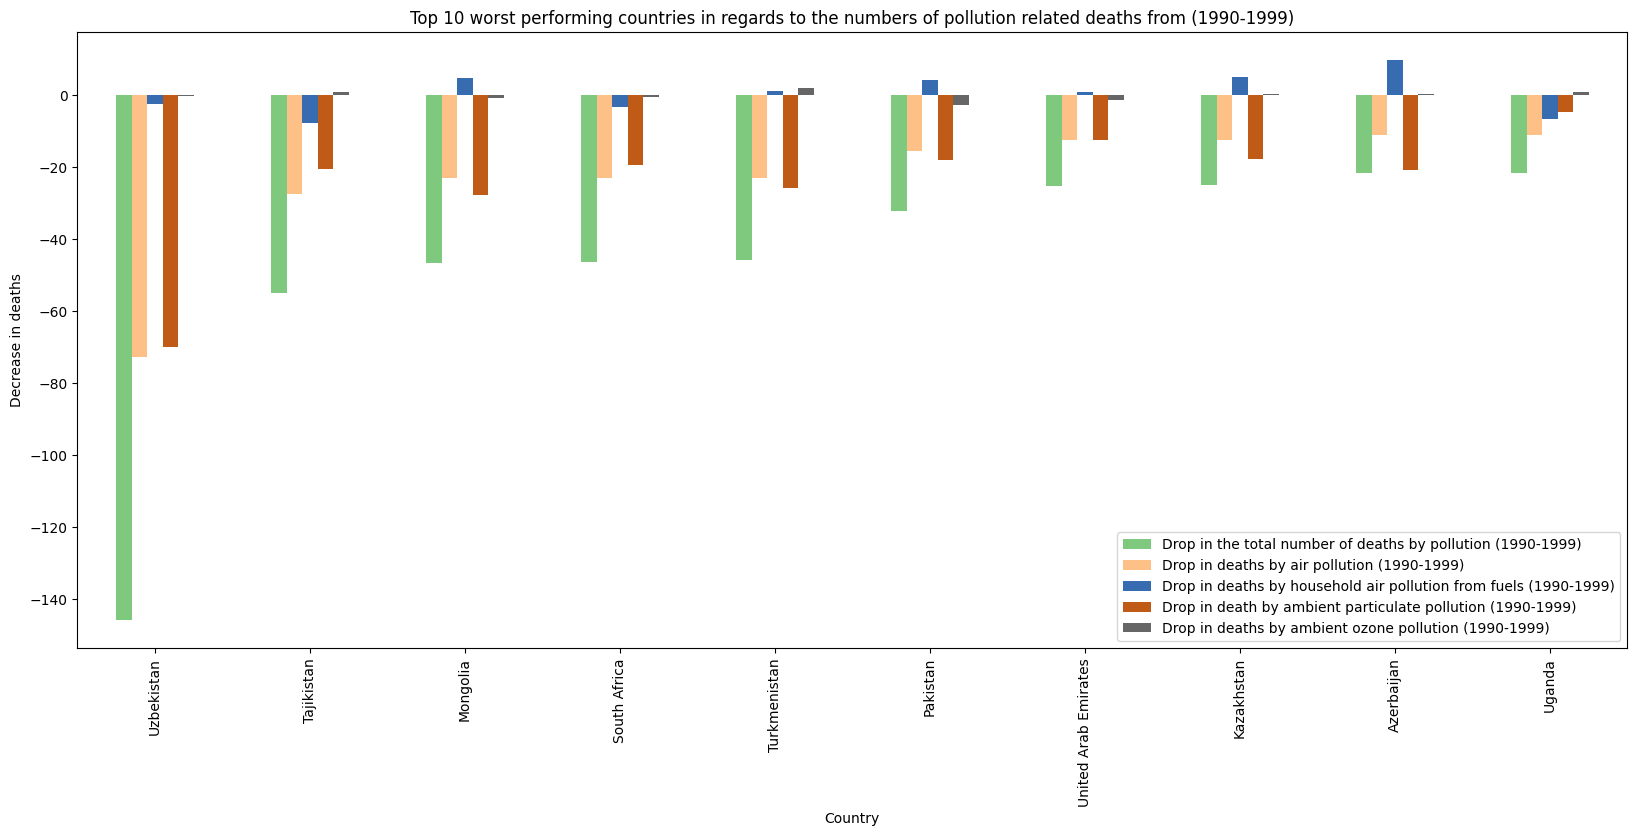

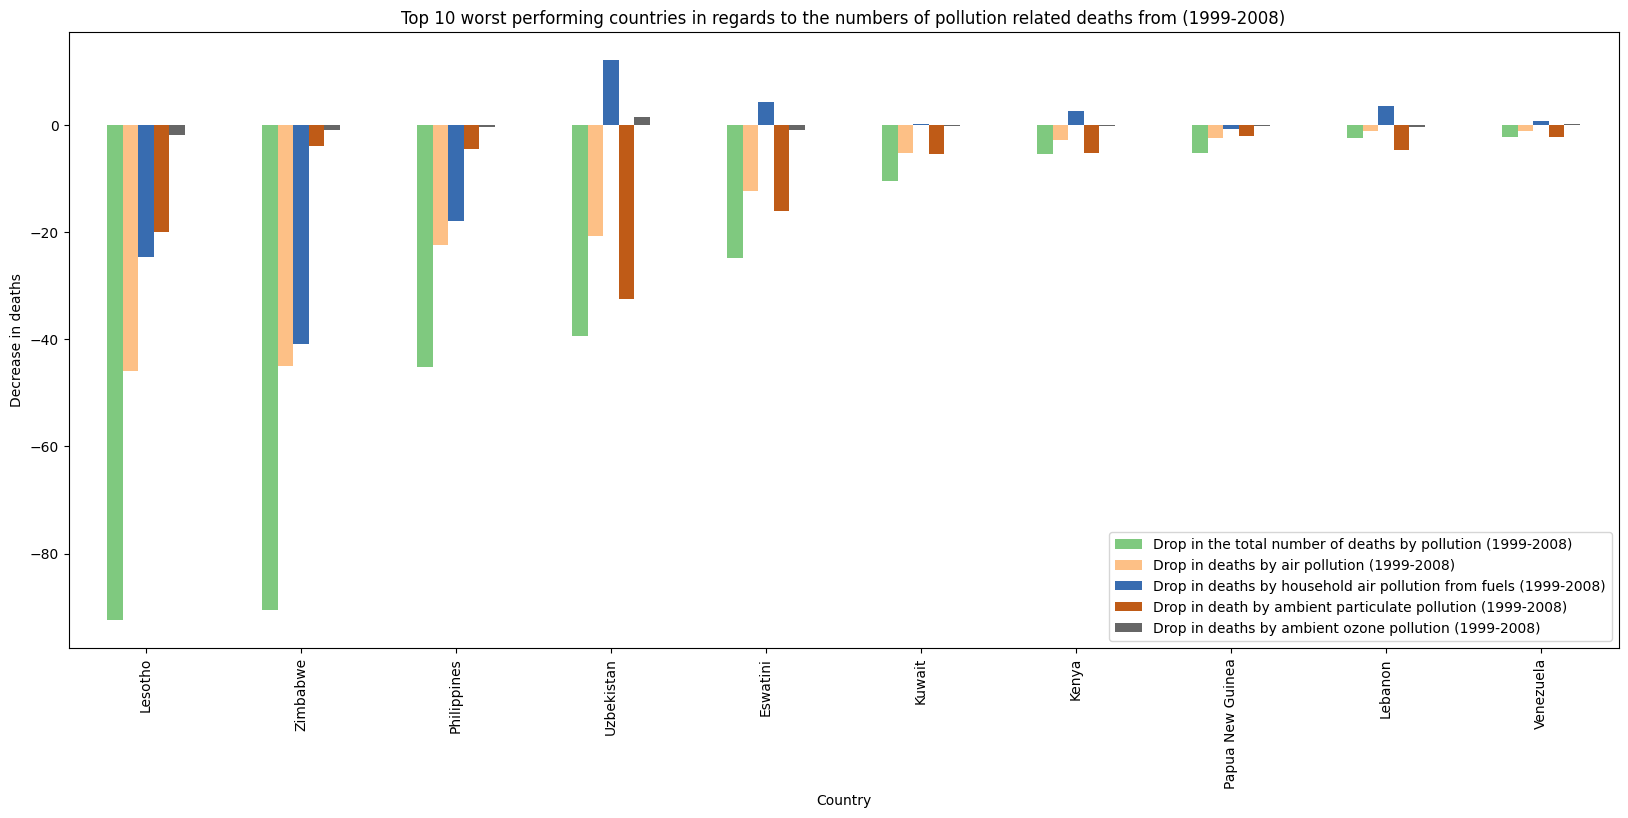

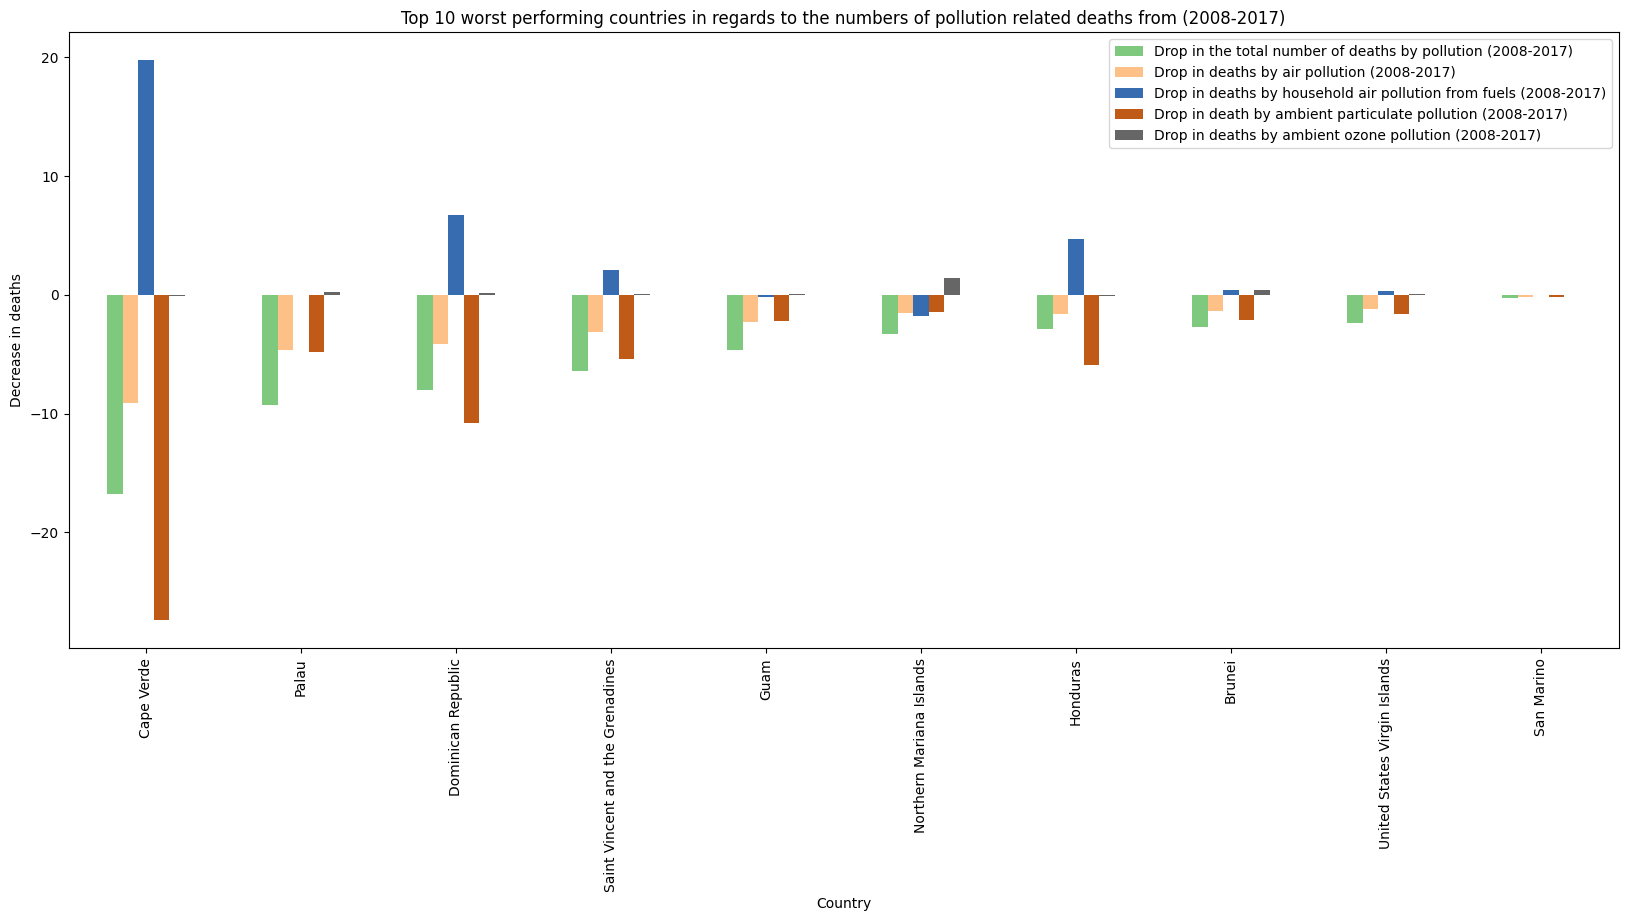

In [15]:
hlist = ['h1','h2','h3']

print("\n\nLet's see which countries decreased their pollution deaths the least over the years.\n\n\n\n")

for index,i in enumerate(hlist):
    i = dflist[index].sort_values('Drop in the total number of deaths by pollution ' + klist[index], ascending = True).head(10)
    i.plot.bar(figsize = (20,8), ylabel= 'Decrease in deaths',
               title = 'Top 10 worst performing countries in regards to the numbers of pollution related deaths from ' + klist[index],
               colormap = 'Accent')

In [16]:
del df_death_rates['Total pollution deaths']

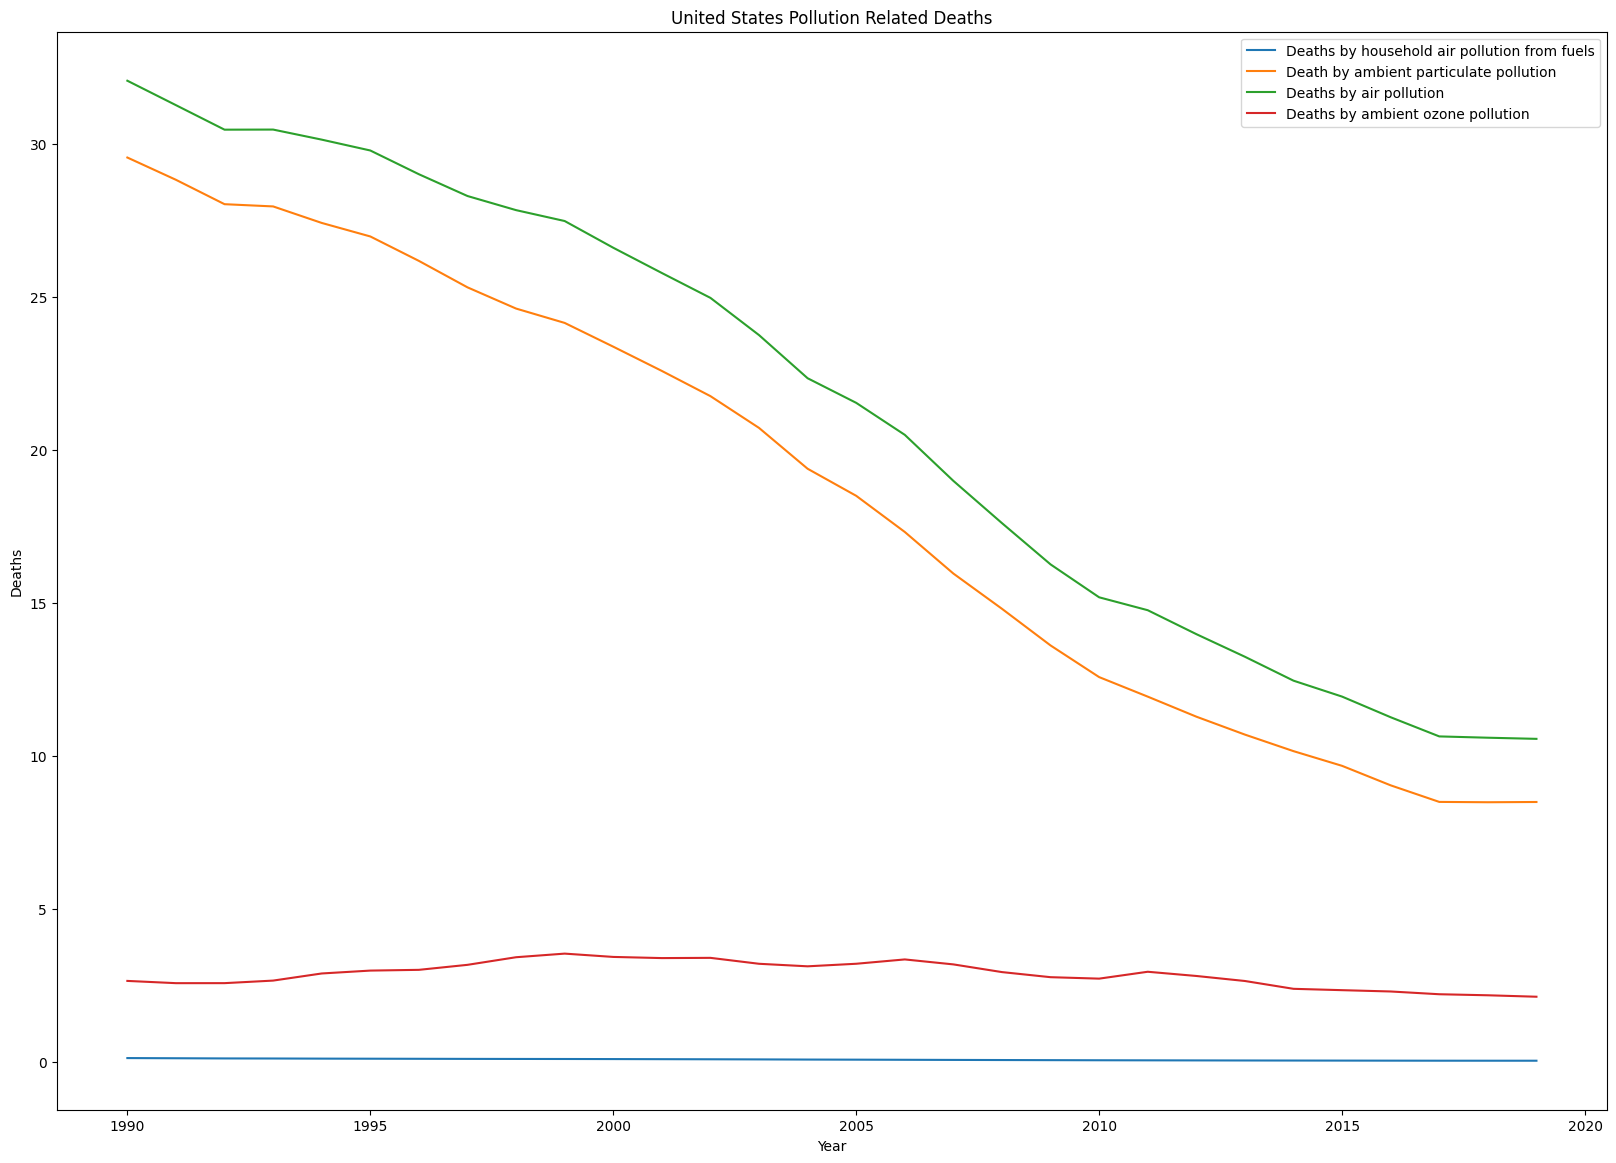

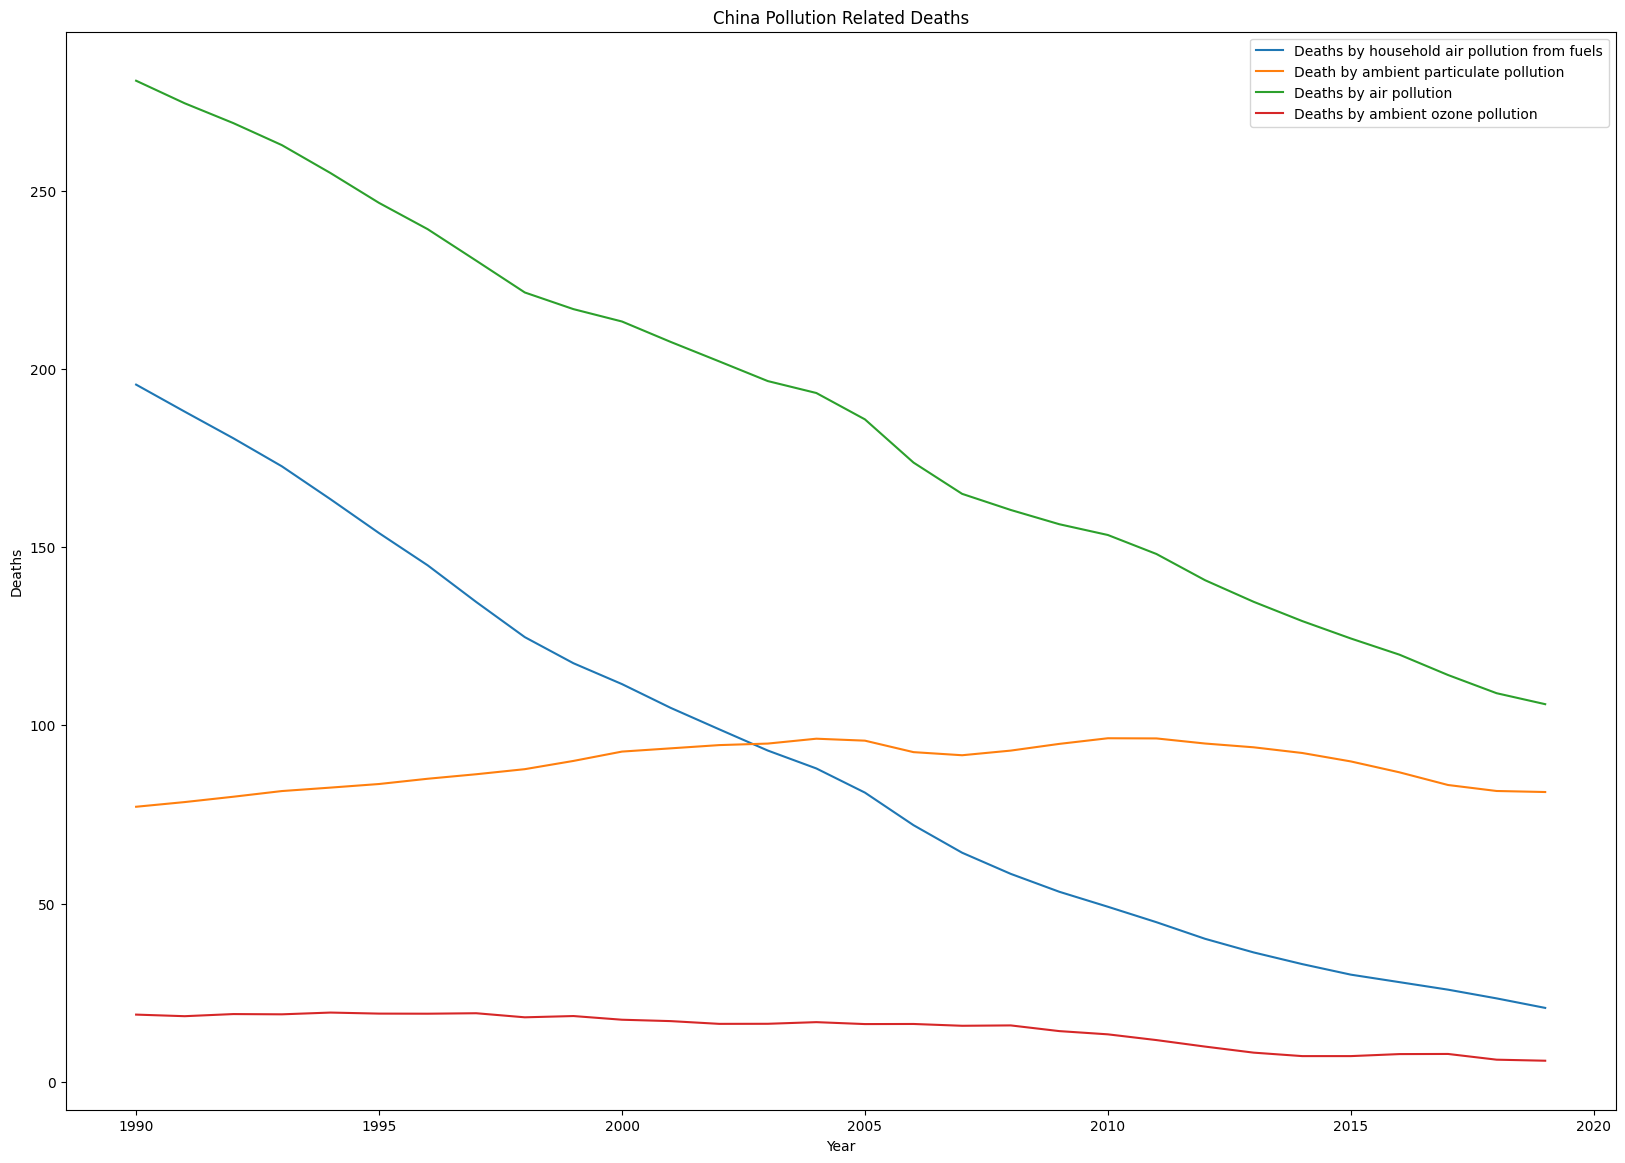

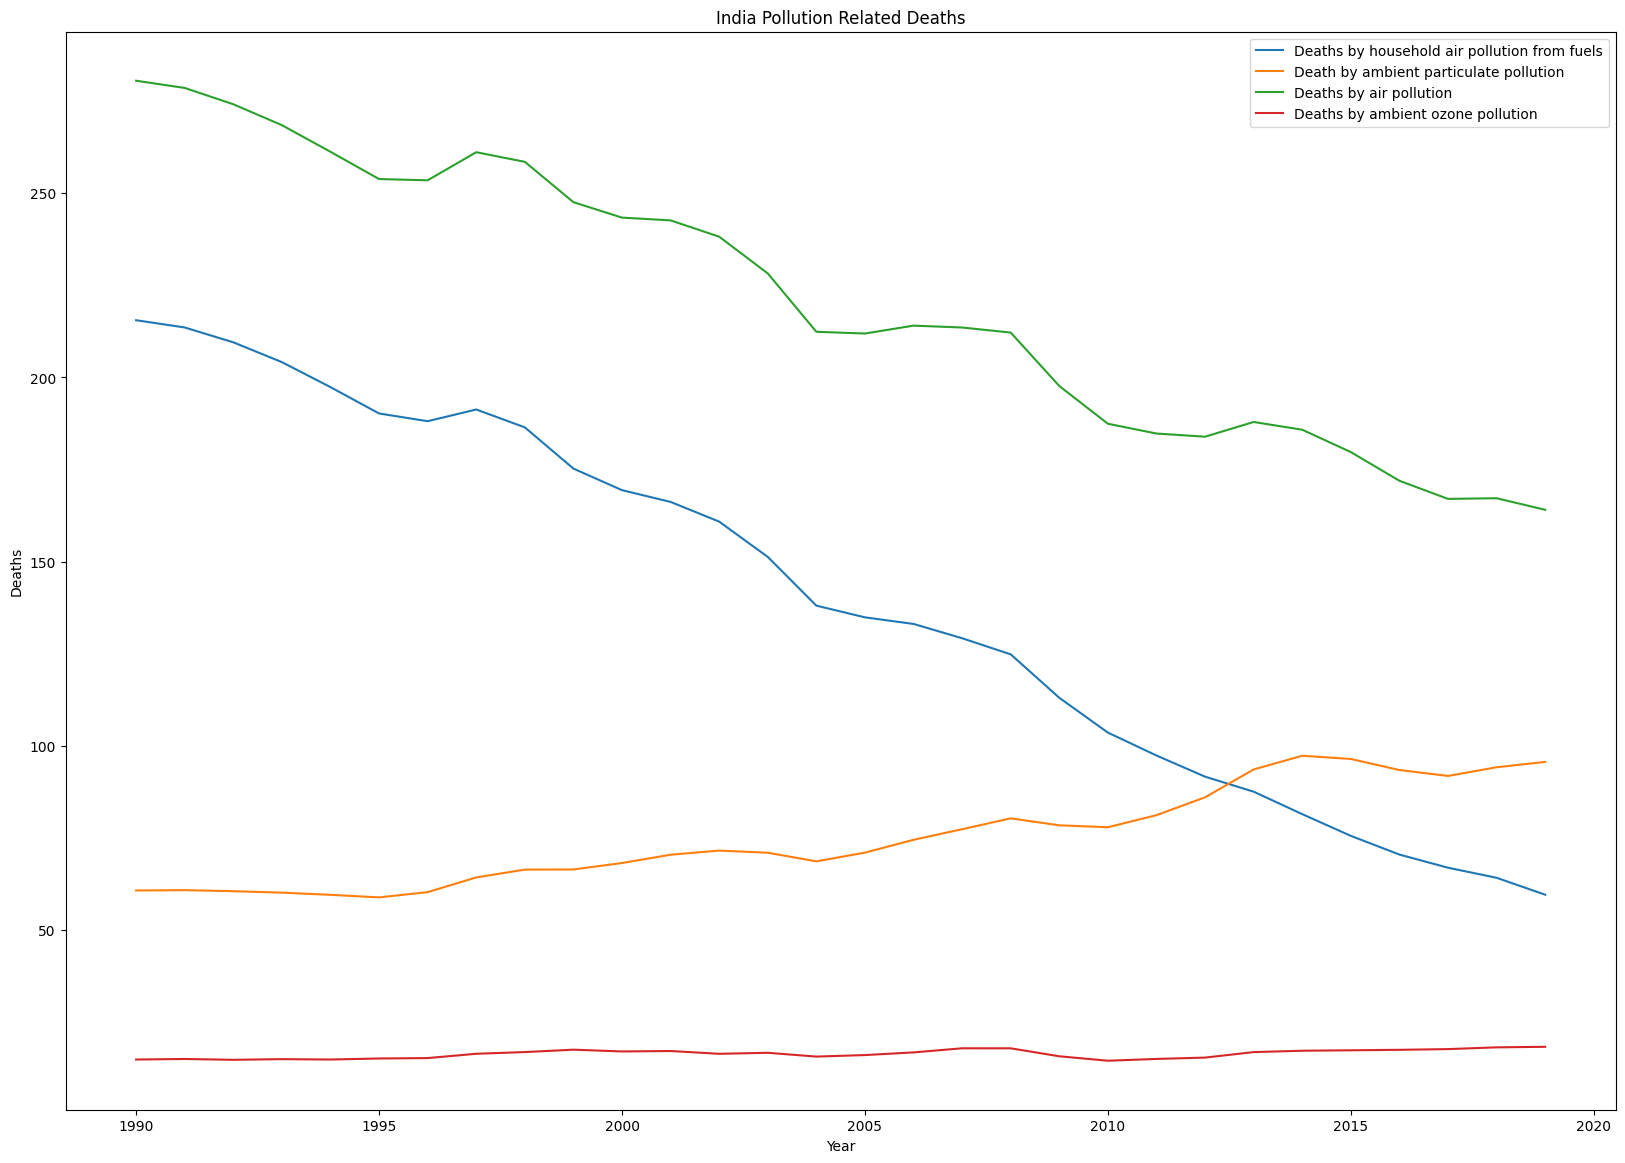

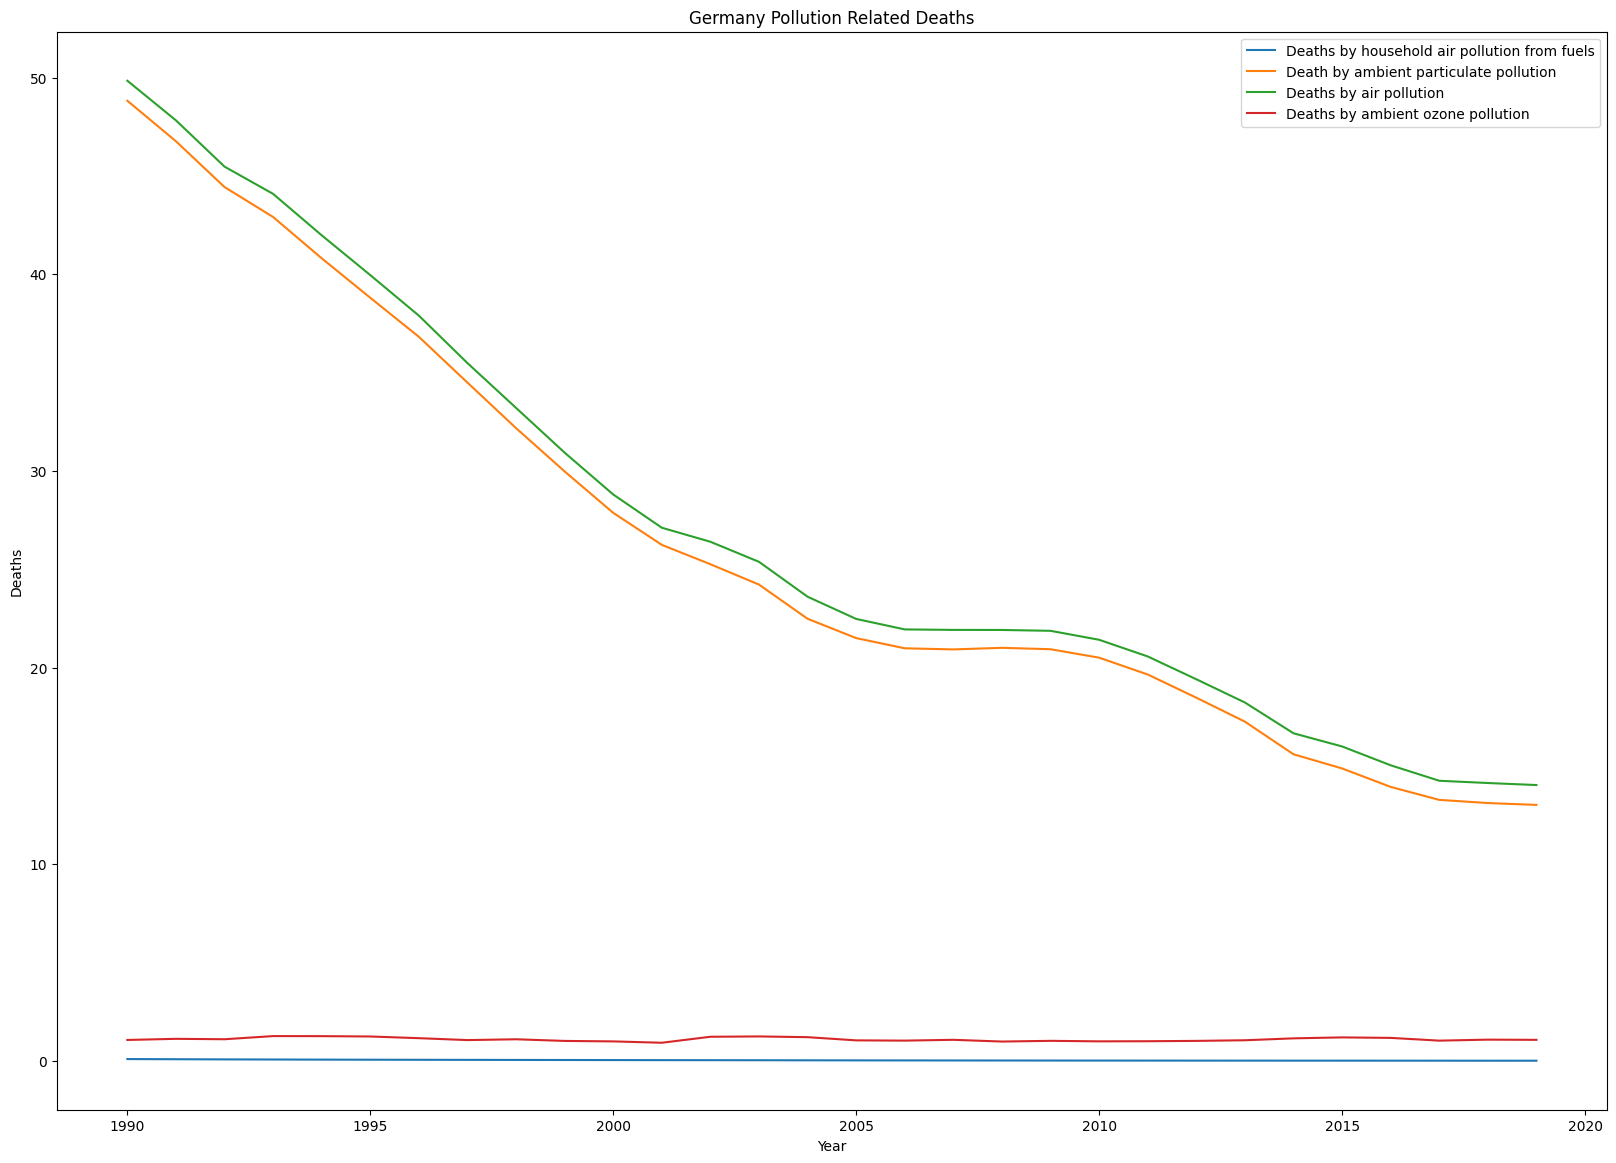

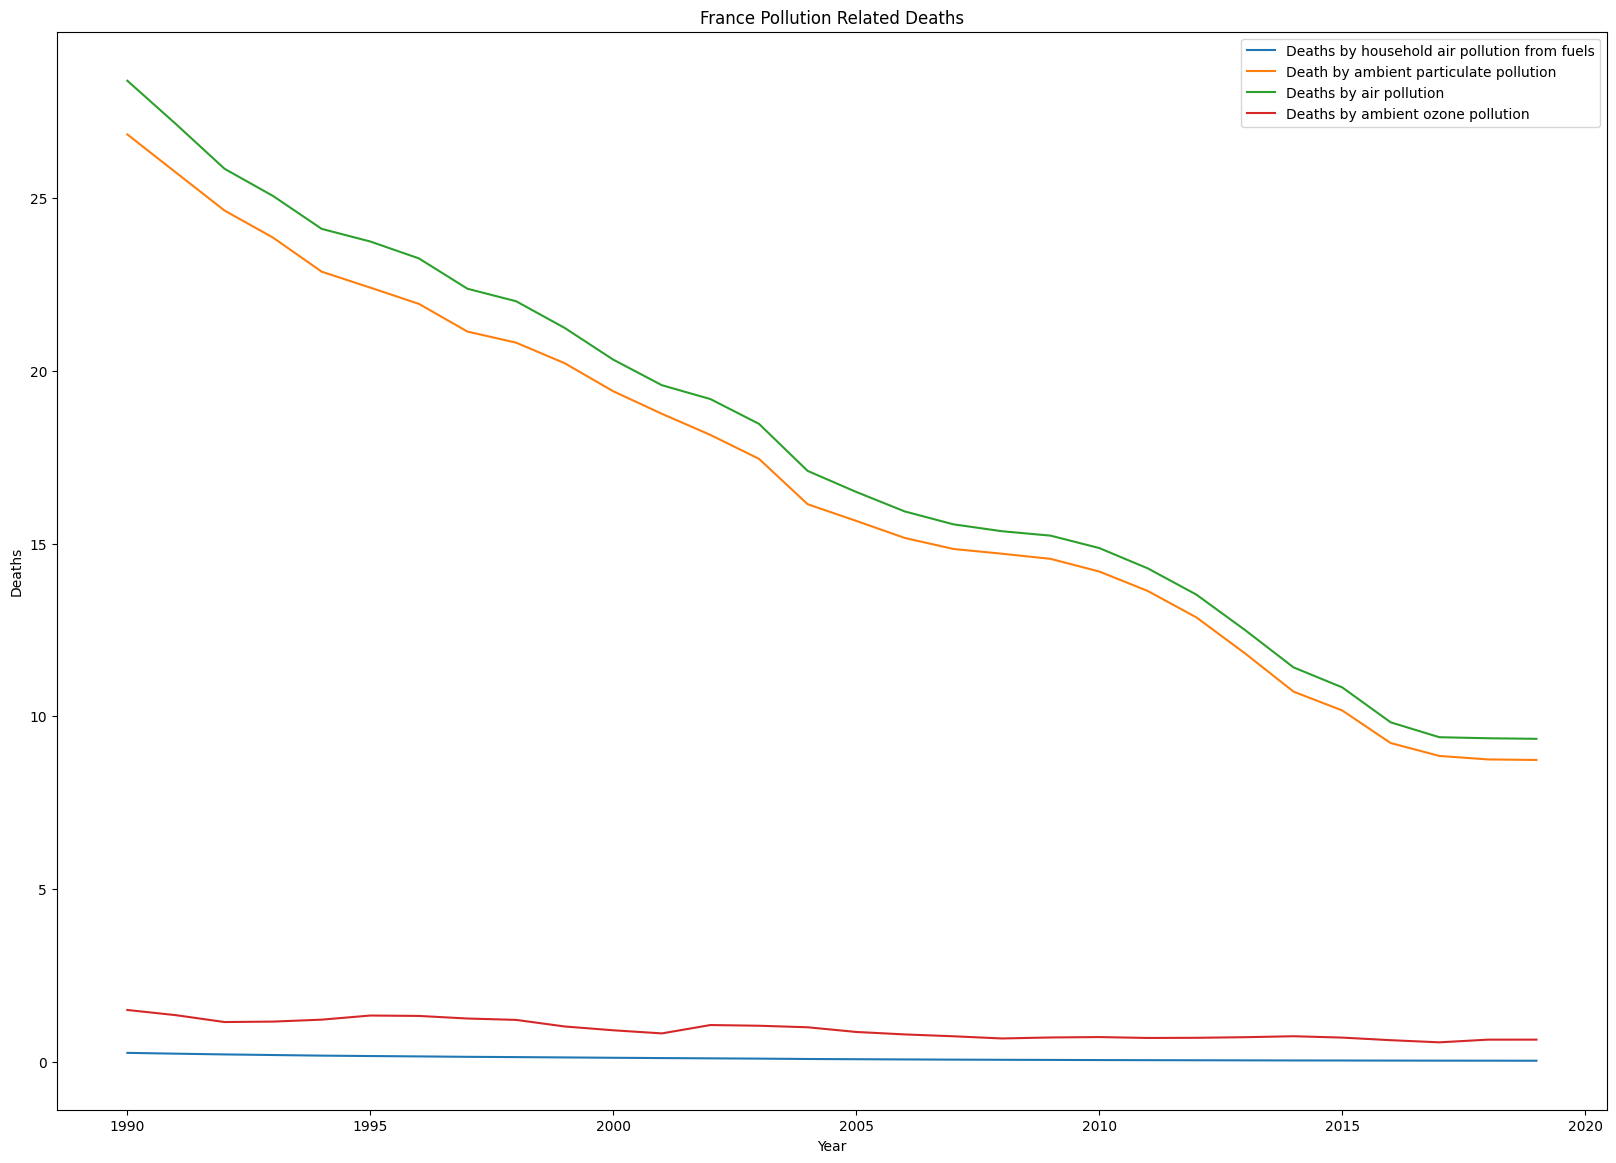

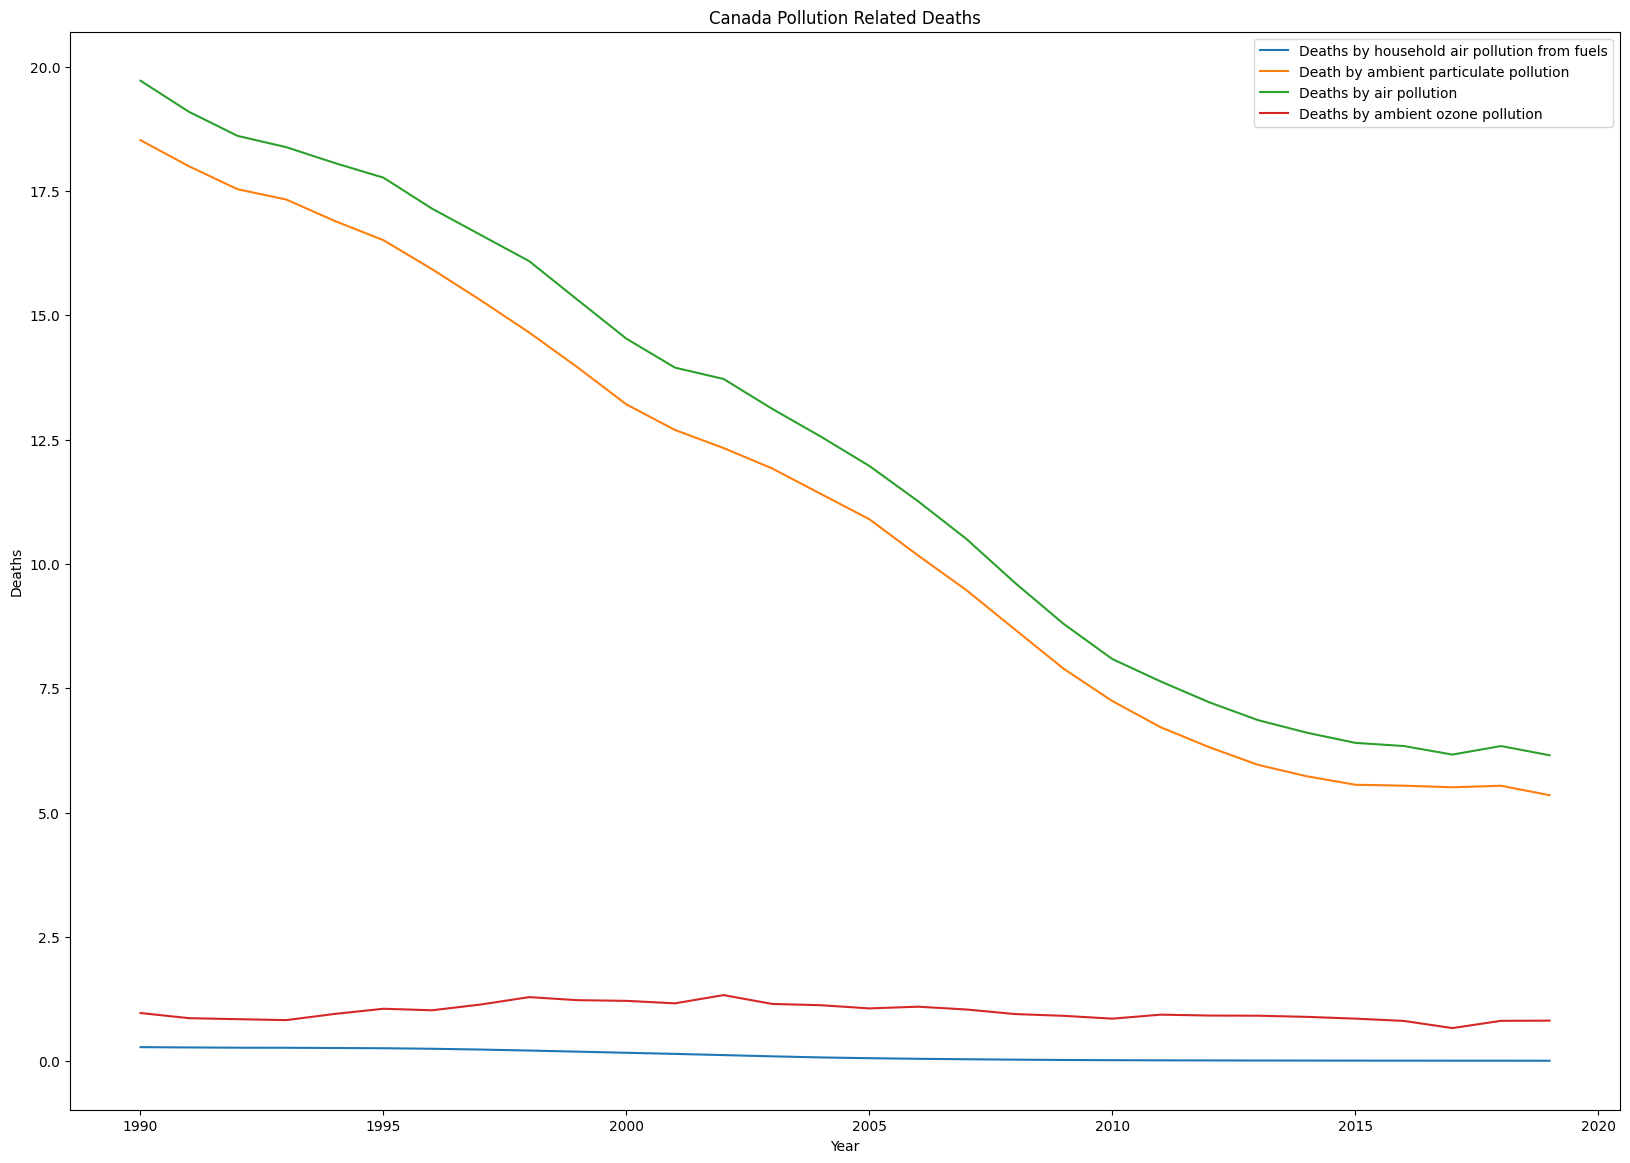

In [17]:
US = df_death_rates[df_death_rates['Entity'] == 'United States'].set_index(['Year'])
China = df_death_rates[df_death_rates['Entity'] == 'China'].set_index(['Year'])
India = df_death_rates[df_death_rates['Entity'] == 'India'].set_index(['Year'])
Germany = df_death_rates[df_death_rates['Entity'] == 'Germany'].set_index(['Year'])
France = df_death_rates[df_death_rates['Entity'] == 'France'].set_index(['Year'])
Canada = df_death_rates[df_death_rates['Entity'] == 'Canada'].set_index(['Year'])


l = [US,China,India,Germany,France,Canada]
for i in l:
    i.plot(title = i.iloc[0][0] + ' Pollution Related Deaths', ylabel = 'Deaths' , figsize = (20,14))

In [56]:
df_disease_burdan_by_risk_factor = pd.read_csv('../data/Air-pollution/disease-burden-by-risk-factor.csv')
del df_disease_burdan_by_risk_factor['Code']
df_disease_burdan_by_risk_factor_shuffled = df_disease_burdan_by_risk_factor.sample(frac=1).reset_index(drop=True)

In [57]:
diseases_2017 = df_disease_burdan_by_risk_factor_shuffled[df_disease_burdan_by_risk_factor_shuffled['Year'] == 2017]
del diseases_2017['Year']

In [58]:
diseases_2017

,Entity,DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number),...,DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High LDL cholesterol - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Zinc deficiency - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: All Ages (Number)
37,Chad,5802.019907,5.686987e+05,1.345119e+06,2.925641e+06,2.052632e+05,1.364685e+05,5.095311e+05,8.901963e+04,7.851553e+04,...,3.851891e+04,2.019629e+04,1.557959e+04,1.196792e+06,5.271239e+04,1.763915e+05,4846.848817,9.159824e+04,1.861472e+05,1.478149e+05
89,Ukraine,171444.603493,2.682929e+03,1.018074e+06,2.210584e+04,4.515712e+06,1.466575e+06,2.025035e+03,2.878754e+06,3.776564e+05,...,5.349740e+05,2.893078e+05,5.441636e+05,6.473600e+04,3.069869e+06,4.587688e+04,18.894039,3.200718e+06,7.674927e+01,9.447973e+05
117,Barbados,2078.993045,3.834969e+01,3.779994e+03,2.430674e+02,1.010352e+04,1.380704e+04,9.663700e+00,1.259369e+04,7.467987e+02,...,1.465217e+03,5.585107e+02,4.772584e+02,5.240276e+00,3.153517e+03,5.536626e+02,0.214018,3.666799e+03,8.462306e+00,3.774732e+03
146,Egypt,540940.615611,2.438583e+05,2.793152e+06,9.429716e+05,4.105485e+06,2.504321e+06,1.230856e+05,3.994860e+06,6.867133e+05,...,1.254889e+05,1.570413e+05,1.329375e+05,3.300425e+03,2.355366e+06,2.397109e+05,829.882028,2.181695e+06,7.991400e+03,2.766431e+06
151,Wales,19238.145616,1.099655e+02,1.421908e+04,1.297966e+03,8.350038e+04,6.149964e+04,6.491590e+00,7.501646e+04,1.064301e+04,...,1.282290e+04,6.202282e+03,2.269776e+04,2.033574e+01,4.408298e+04,1.705034e+03,0.975759,1.493822e+05,9.267754e+00,1.384178e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,Sub-Saharan Africa (WB),823351.406730,8.943292e+06,5.150322e+07,5.945665e+07,1.762047e+07,1.175463e+07,1.125637e+07,1.123361e+07,2.797408e+06,...,2.184848e+06,1.730274e+06,2.431887e+06,4.059378e+07,4.437638e+06,8.180070e+06,182219

In [59]:
diseases_2017.rename(columns={
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)': 'Low physical activity',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)': 'Non-exclusive breastfeeding',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)': 'Air pollution',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number)': 'Child wasting',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)': 'High systolic blood pressure',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number)': 'High fasting plasma glucose',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number)': 'Child stunting',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)': 'High body-mass index',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)': 'Secondhand smoke',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)': 'Diet low in fruits',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)': 'Diet high in sodium',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)': 'Drug use',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)': 'Househould air pollution from solid fuels',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: High LDL cholesterol - Sex: Both - Age: All Ages (Number)': 'High LDL cholesterol',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)': 'Iron deficiency',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Zinc deficiency - Sex: Both - Age: All Ages (Number)': 'Zinc deficiency',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number)': 'Smoking',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)': 'Vitamin A deficiency',
    'DALYs (Disability-Adjusted Life Years) - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: All Ages (Number)': 'Ambient particulate matter pollution'
}, inplace=True)

C:\Users\Matheus Vieira\AppData\Local\Temp\ipykernel_4064\69996717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diseases_2017.rename(columns={


In [60]:
diseases_2017

,Entity,Low physical activity,Non-exclusive breastfeeding,Air pollution,Child wasting,High systolic blood pressure,High fasting plasma glucose,Child stunting,High body-mass index,Secondhand smoke,...,Diet low in fruits,Diet high in sodium,Drug use,Househould air pollution from solid fuels,High LDL cholesterol,Iron deficiency,Zinc deficiency,Smoking,Vitamin A deficiency,Ambient particulate matter pollution
37,Chad,5802.019907,5.686987e+05,1.345119e+06,2.925641e+06,2.052632e+05,1.364685e+05,5.095311e+05,8.901963e+04,7.851553e+04,...,3.851891e+04,2.019629e+04,1.557959e+04,1.196792e+06,5.271239e+04,1.763915e+05,4846.848817,9.159824e+04,1.861472e+05,1.478149e+05
89,Ukraine,171444.603493,2.682929e+03,1.018074e+06,2.210584e+04,4.515712e+06,1.466575e+06,2.025035e+03,2.878754e+06,3.776564e+05,...,5.349740e+05,2.893078e+05,5.441636e+05,6.473600e+04,3.069869e+06,4.587688e+04,18.894039,3.200718e+06,7.674927e+01,9.447973e+05
117,Barbados,2078.993045,3.834969e+01,3.779994e+03,2.430674e+02,1.010352e+04,1.380704e+04,9.663700e+00,1.259369e+04,7.467987e+02,...,1.465217e+03,5.585107e+02,4.772584e+02,5.240276e+00,3.153517e+03,5.536626e+02,0.214018,3.666799e+03,8.462306e+00,3.774732e+03
146,Egypt,540940.615611,2.438583e+05,2.793152e+06,9.429716e+05,4.105485e+06,2.504321e+06,1.230856e+05,3.994860e+06,6.867133e+05,...,1.254889e+05,1.570413e+05,1.329375e+05,3.300425e+03,2.355366e+06,2.397109e+05,829.882028,2.181695e+06,7.991400e+03,2.766431e+06
151,Wales,19238.145616,1.099655e+02,1.421908e+04,1.297966e+03,8.350038e+04,6.149964e+04,6.491590e+00,7.501646e+04,1.064301e+04,...,1.282290e+04,6.202282e+03,2.269776e+04,2.033574e+01,4.408298e+04,1.705034e+03,0.975759,1.493822e+05,9.267754e+00,1.384178e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,Sub-Saharan Africa (WB),823351.406730,8.943292e+06,5.150322e+07,5.945665e+07,1.762047e+07,1.175463e+07,1.125637e+07,1.123361e+07,2.797408e+06,...,2.184848e+06,1.730274e+06,2.431887e+06,4.059378e+07,4.437638e+06,8.180070e+06,182219.401078,7.327443e+06,2.624457e+06,1.085298e+07
6746,Zambia,7218.032437,7.701350e+04,6.086629e+05,6.160261e+05,2.511283e+05,1.795101e+05,1.176004e+05,1.912405e+05,4.065907e+04,...,5.908372e+04,4.097780e+04,2.781915e+04,4.743170e+05,5.813147e+04,2.042248e+05,1824.030064,1.356474e+05,2.079308e+04,1.331437e+05
6748,Northern Ireland,8171.938360,7.412721e+01,6.451297e+03,7.786030e+02,4.156536e+04,3.368746e+04,4.383620e+00,4.037106e+04,6.017672e+03,...,5.647529e+03,2.899552e+03,9.766285e+03,1.136759e+01,1.940720e+04,9.650133e+02,0.665238,6.986236e+04,4.967435e+00,6.308330e+03
6794,Rwanda,2443.864025,1.085765e+04,4.115506e+05,2.879662e+05,1.634447e+05,1.189765e+05,5.060588e+04,9.172158e+04,2.334113e+04,...,6.792389e+02,2.686317e+04,8.833199e+03,3.417723e+05,2.276077e+04,5.250109e+04,1060.734455,1.255075e+05,7.966765e+03,6.898200e+04


In [61]:
diseases_2017_br = diseases_2017[diseases_2017['Entity'] == 'Brazil']
diseases_2017_br

,Entity,Low physical activity,Non-exclusive breastfeeding,Air pollution,Child wasting,High systolic blood pressure,High fasting plasma glucose,Child stunting,High body-mass index,Secondhand smoke,...,Diet low in fruits,Diet high in sodium,Drug use,Househould air pollution from solid fuels,High LDL cholesterol,Iron deficiency,Zinc deficiency,Smoking,Vitamin A deficiency,Ambient particulate matter pollution
3465,Brazil,999842.521233,118590.758398,1.690594e+06,622706.393216,5.185389e+06,4.559488e+06,38487.229002,5.515833e+06,736225.575192,...,298154.50213,667477.353823,732378.398273,471382.598326,2.291836e+06,693408.775993,262.794157,4.578137e+06,23643.245902,1.183175e+06
